In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
import json
import requests
import datetime as dt

url = 'https://api.binance.com/api/v3/klines'
symbol = 'BTCUSDT'
interval = '1d'
start = str(int(dt.datetime(2022,1,1).timestamp()*1000)) #data start from: 2017,8,16
end = str(int(dt.datetime(2023,1,30).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end, 'limit': 1000}
btc = pd.DataFrame(json.loads(requests.get(url, params= par).text))
btc.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
btc.drop(columns=['open', 'high', 'low', 'volume', 'close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore'], inplace = True) #we will only use close price
btc.index = [dt.datetime.fromtimestamp(x/1000.0) for x in btc.datetime]
btc=btc.astype(float)
btc.head()

,datetime,close
2022-01-01 21:00:00,1.641082e+12,47286.18
2022-01-02 21:00:00,1.641168e+12,46446.10
2022-01-03 21:00:00,1.641254e+12,45832.01
2022-01-04 21:00:00,1.641341e+12,43451.13
2022-01-05 21:00:00,1.641427e+12,43082.31


algo

In [16]:
btc['10d-ma'] = btc['close'].rolling(10).mean().shift()
btc['20d-ma'] = btc['close'].rolling(20).mean().shift()
btc[9:21]

,datetime,close,10d-ma,20d-ma,signal,return,algo_return,entry
2022-01-30 21:00:00,1.643587e+12,38466.90,NaN,NaN,-1,0.015328,-0.015328,0.0
2022-01-31 21:00:00,1.643674e+12,38694.59,37113.614,NaN,-1,0.005902,-0.005902,0.0
2022-02-01 21:00:00,1.643760e+12,36896.36,37475.931,NaN,-1,-0.047587,0.047587,0.0
2022-02-02 21:00:00,1.643846e+12,37311.61,37541.112,NaN,-1,0.011192,-0.011192,0.0
2022-02-03 21:00:00,1.643933e+12,41574.25,37606.238,NaN,-1,0.108176,-0.108176,0.0
2022-02-04 21:00:00,1.644019e+12,41382.59,38067.831,NaN,-1,-0.004621,0.004621,0.0
2022-02-05 21:00:00,1.644106e+12,42380.87,38525.156,NaN,1,0.023837,0.023837,2.0
2022-02-06 21:00:00,1.644192e+12,43839.99,39047.233,NaN,1,0.033849,0.033849,0.0
2022-02-07 21:00:00,1.644278e+12,44042.99,39659.576,NaN,1,0.004620,0.004620,0.0
2022-02-08 21:00:00,1.644365e+12,44372.72,40247.191,NaN,1,0.007459,0.007459,0.0


algo (entries)

In [7]:
btc['signal'] = np.where(btc['10d-ma'] > btc['20d-ma'], 1, 0) #long signal                  #np.where is like an if function 
btc['signal'] = np.where(btc['10d-ma'] < btc['20d-ma'], -1, btc['signal']) #short signal
btc.dropna(inplace = True)
btc.head()

,datetime,close,10d-ma,20d-ma,signal
2022-01-21 21:00:00,1.642810e+12,35071.42,41901.865,42738.9500,-1
2022-01-22 21:00:00,1.642896e+12,36244.55,41018.741,42128.2120,-1
2022-01-23 21:00:00,1.642982e+12,36660.35,40387.185,41618.1345,-1
2022-01-24 21:00:00,1.643069e+12,36958.32,39747.224,41159.5515,-1
2022-01-25 21:00:00,1.643155e+12,36809.34,39134.627,40834.9110,-1


returns

In [8]:
btc['return'] = np.log(btc['close']).diff()
btc['algo_return'] = btc['signal'] * btc['return']
btc['entry'] =  btc.signal.diff()
btc.head()

,datetime,close,10d-ma,20d-ma,signal,return,algo_return,entry
2022-01-21 21:00:00,1.642810e+12,35071.42,41901.865,42738.9500,-1,NaN,NaN,NaN
2022-01-22 21:00:00,1.642896e+12,36244.55,41018.741,42128.2120,-1,0.032902,-0.032902,0.0
2022-01-23 21:00:00,1.642982e+12,36660.35,40387.185,41618.1345,-1,0.011407,-0.011407,0.0
2022-01-24 21:00:00,1.643069e+12,36958.32,39747.224,41159.5515,-1,0.008095,-0.008095,0.0
2022-01-25 21:00:00,1.643155e+12,36809.34,39134.627,40834.9110,-1,-0.004039,0.004039,0.0


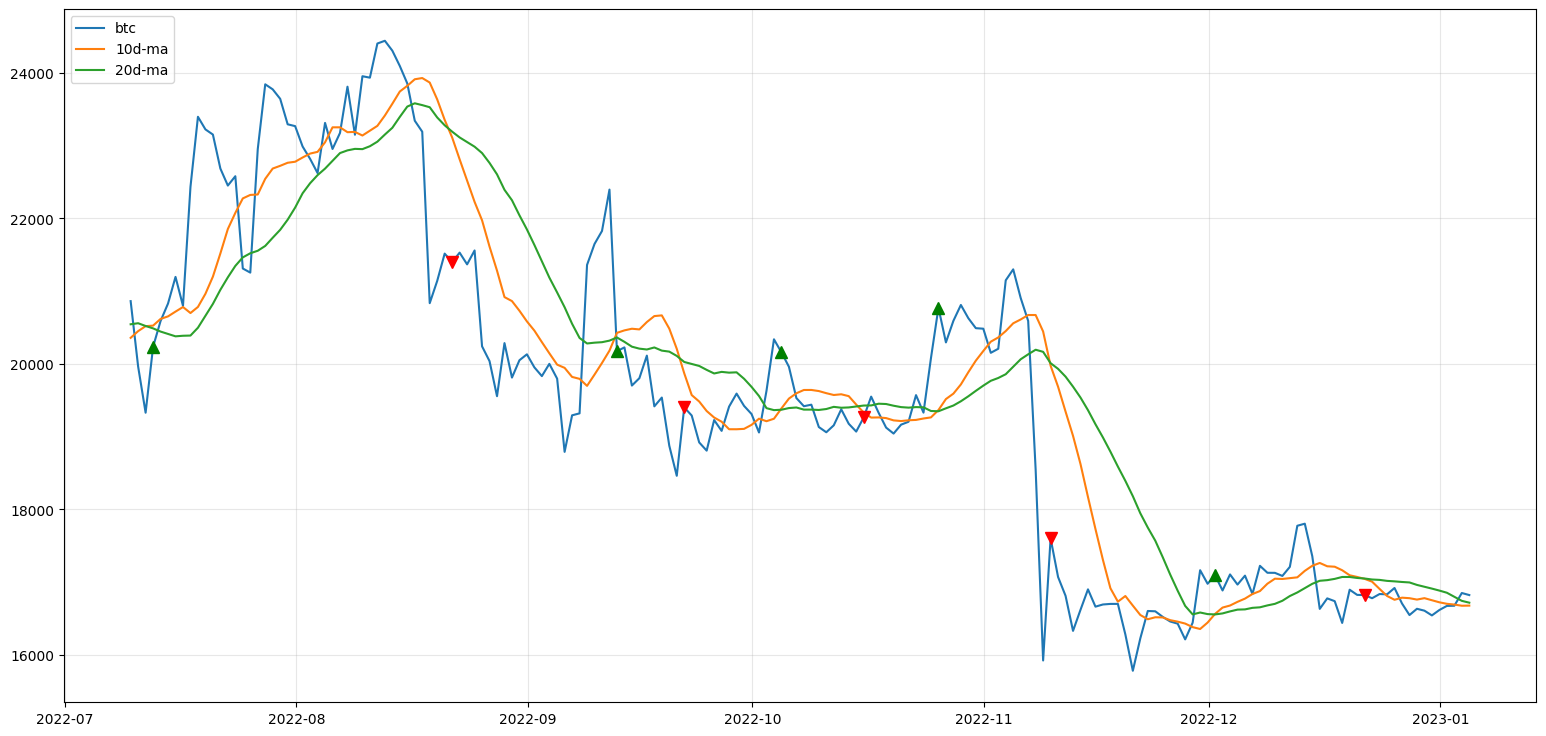

In [13]:
plt.rcParams['figure.figsize'] = 19, 9
plt.grid(True, alpha = .3)
plt.plot(btc.iloc[-180:]['close'], label = 'btc')
plt.plot(btc.iloc[-180:]['10d-ma'], label = '10d-ma')
plt.plot(btc.iloc[-180:]['20d-ma'], label = '20d-ma')
plt.plot(btc[-180:].loc[btc.entry == 2].index, btc[-180:]['close'][btc.entry == 2], '^',
         color = 'g', markersize = 8)
plt.plot(btc[-180:].loc[btc.entry == -2].index, btc[-180:]['close'][btc.entry == -2], 'v',
         color = 'r', markersize = 8)
plt.legend(loc=2);

performance

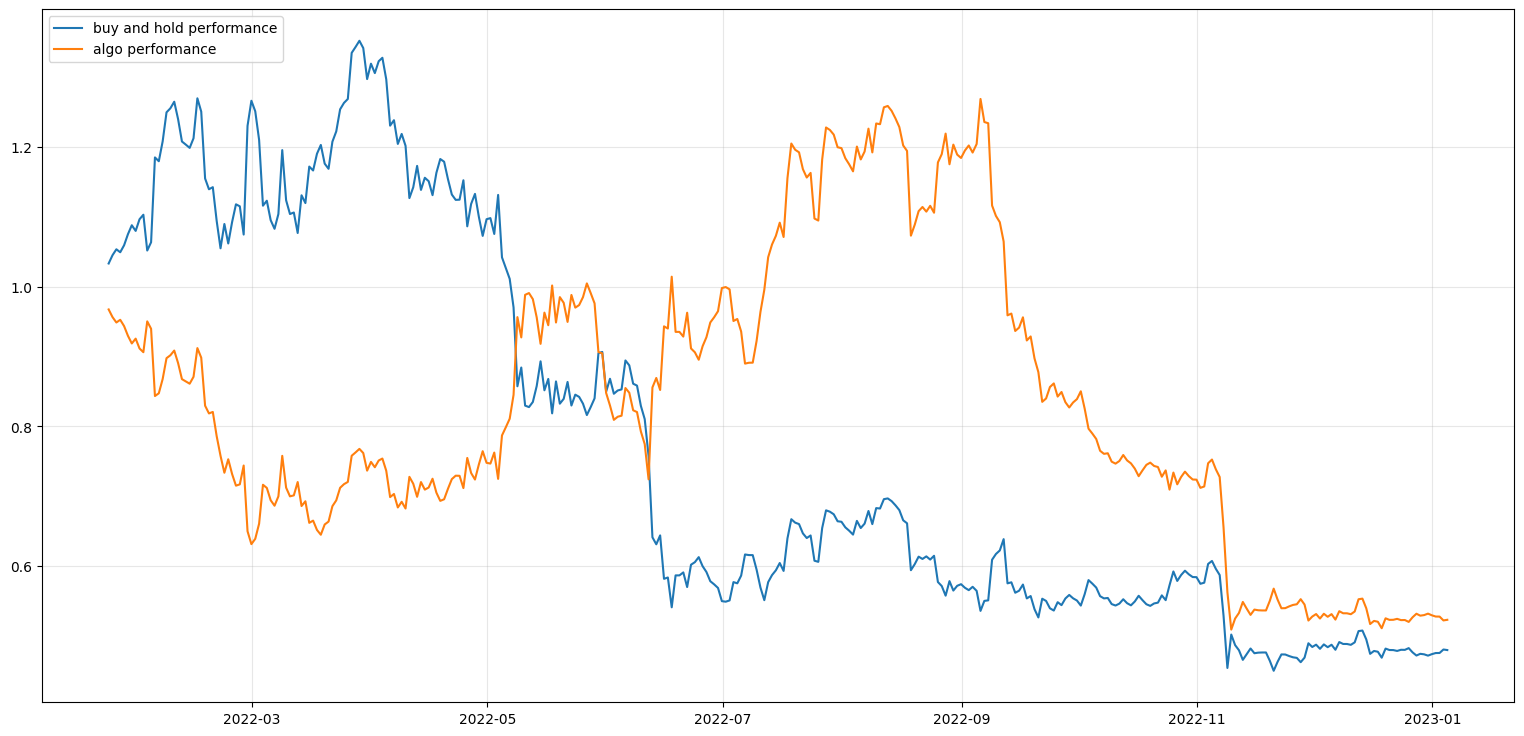

In [14]:
plt.plot(np.exp(btc['return']).cumprod(), label='buy and hold performance')
plt.plot(np.exp(btc['algo_return']).cumprod(), label='algo performance')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

returns

buy n hold (%)

In [11]:
(np.exp(btc['return']).cumprod()[-1] - 1) *100   #[-1] -> last day of returns

-52.03479072133368

system (%)

In [12]:
(np.exp(btc['algo_return']).cumprod()[-1] - 1) *100

-47.70017643664804